# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
cat=Table.read('./data/dmu26_XID+SPIRE_SA13_cat.fits')


In [3]:
cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J131155.926+422724.245,197.9830256104579,42.45673458475228,6.400151,11.956752,2.1420987,1.4689075,3.7097378,0.39275062,0.99126333,2.1224077,0.3038686,-0.22788735,-0.5558853,-0.50664395,0.03146599,0.05807256,0.06460694,0.9994167,0.999254,1.0004528,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J131159.084+422744.874,197.9961818352109,42.462465017830496,8.015142,14.534339,3.2009454,17.337515,24.01396,11.149176,1.0719006,2.1305015,0.34952006,-0.22788735,-0.5558853,-0.50664395,0.03146599,0.05807256,0.06460694,0.99932265,1.0012529,1.0008192,2000.0,2000.0,1409.0,0.0,0.0,0.0
HELP_J131203.971+422752.142,198.01654378359223,42.46448388214684,3.5824435,7.4906783,1.0606859,7.2506485,14.379032,2.4052541,3.4885702,6.7649612,1.1485065,-0.22788735,-0.5558853,-0.50664395,0.03146599,0.05807256,0.06460694,0.99936783,0.9992957,0.99856526,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J131206.215+422844.366,198.02589649243384,42.47899058366238,4.2705917,8.686546,1.3610655,3.471635,7.1856337,1.0192345,2.8802922,6.2703958,0.8031341,-0.22788735,-0.5558853,-0.50664395,0.03146599,0.05807256,0.06460694,1.0000904,0.9994313,1.0007526,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J131206.815+422748.045,198.0283956572963,42.4633457984518,0.86438656,1.6932907,0.25246158,0.9991011,2.3735476,0.2689053,0.7877487,1.7679394,0.19751798,-0.22788735,-0.5558853,-0.50664395,0.03146599,0.05807256,0.06460694,0.99970764,0.9997226,1.0002108,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J131208.943+422719.484,198.03726132414238,42.455412102374964,0.45820937,0.8702667,0.17257941,1.0895903,2.1041493,0.37423792,0.59167564,1.3538991,0.15592384,-0.22788735,-0.5558853,-0.50664395,0.03146599,0.05807256,0.06460694,0.99817294,0.99945074,0.9993974,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J131210.396+422744.118,198.04331503927125,42.4622549449719,0.47826114,1.0317497,0.1264732,0.6712507,1.5009167,0.17598726,0.4329447,0.91862196,0.11054191,-0.22788735,-0.5558853,-0.50664395,0.03146599,0.05807256,0.06460694,0.9989443,1.0017806,1.000247,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J131210.460+422727.396,198.04358215464396,42.457610048696125,1.3527752,2.7250402,0.374526,2.107042,3.9167464,0.66528976,0.51324296,1.1086954,0.14685404,-0.22788735,-0.5558853,-0.50664395,0.03146599,0.05807256,0.06460694,1.0015956,0.9990177,0.9994823,2000.0,2000.0,2000.0,0.0,0.0,0.0


## Look at Symmetry of PDFs to determine depth level of catalogue

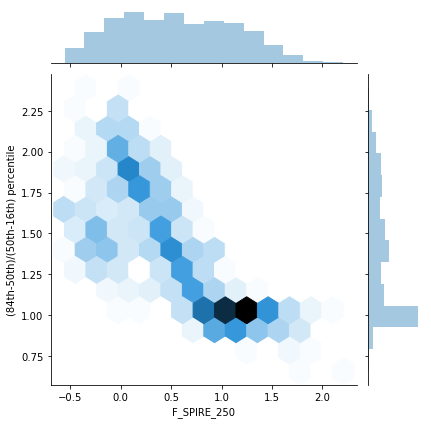

In [4]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')

In [5]:
10**0.6

3.9810717055349722

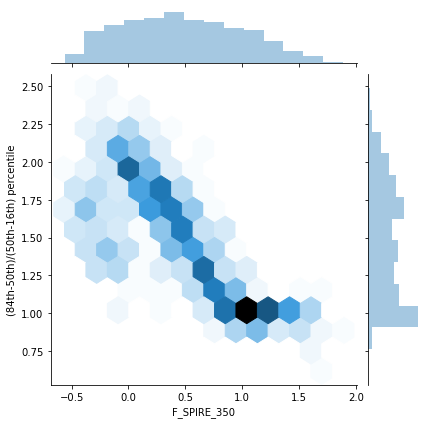

In [6]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')

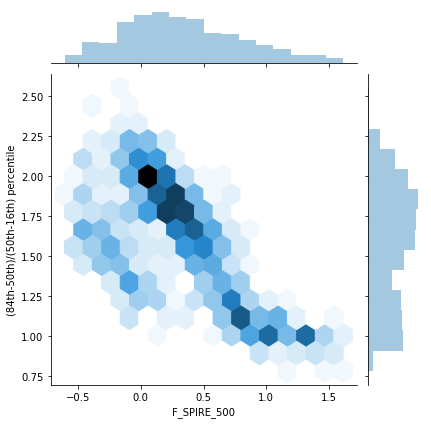

In [7]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')

In [9]:
10**0.6

3.9810717055349722

## Add flag to catalogue

In [10]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_250'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_350'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_500'))

In [11]:
ind_250=(cat['Pval_res_250']>0.5) | (cat['F_SPIRE_250'] < 4)
ind_350=(cat['Pval_res_350']>0.5) | (cat['F_SPIRE_350'] < 4)
ind_500=(cat['Pval_res_500']>0.5) | (cat['F_SPIRE_500'] < 4)


In [12]:
print(ind_250.sum(),ind_350.sum(),ind_500.sum(),len(cat))

472 567 615 812


In [13]:
cat['flag_spire_250'][ind_250]=True
cat['flag_spire_350'][ind_350]=True
cat['flag_spire_500'][ind_500]=True

In [14]:
cat.write('./data/dmu26_XID+SPIRE_SA13_cat_20191024.fits', format='fits',overwrite=True)


### Check Map

In [15]:
from astropy.io import fits
import pylab as plt

In [17]:
Pval=fits.open('./data/dmu26_XID+SPIRE_plw_SA13_Bayes_Pval.fits')


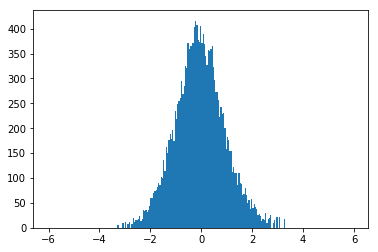

In [18]:
plt.hist(Pval[1].data[np.isfinite(Pval[1].data)],bins=np.arange(-6,6,0.05));

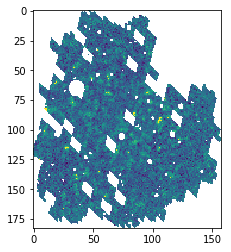

In [19]:
plt.imshow(Pval[1].data)